# DAE Correlation and Regression

author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

## Learning goals
After working your way through this notebook you should be able to..
- Explain what correlation can measure and when it is useful
- Explain what the Pearson correlation coefficient is
- Explain when correlation should and should not be used

## Table of Contents
- [1 Relationship between Variables](#Relationships)  
- [2 Covariance](#Covariance)
- [3 Correlation coefficient](#Coefficient)
- [4 Linear regression](#Regression)


<a id= 'Variables'> </a>

<a id= 'Summarizing'> </a>

In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id= 'Relationships'> </a>

### 1. Relationship between Variables

For both independent and dependent variables we are often interested in seeing whether they have some kind of relationship. A good way to study this is to plot the data against each other 

In [32]:
#In this example we have data from 18 participants and two rating scales (0-100)


data= pd.DataFrame([[83,37],
       [93,23],
       [60,40],
       [47,16],
       [59,59],
       [77,34],
       [30,21],
       [75,45],
       [86,91],
       [100,75],
       [71,0],
       [85,100],
       [75,20],
       [55,38],
       [47,20], 
       [40,37],
       [72,48],                    
       [100,90]], columns=(["Scale1","Scale2"]), index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

#check dimensions of the data structure
data.describe()

,Scale1,Scale2
count,18.000000,18.000000
mean,69.722222,44.111111
std,20.415696,28.445798
min,30.000000,0.000000
25%,56.000000,21.500000
50%,73.500000,37.500000
75%,84.500000,56.250000
max,100.000000,100.000000


### Try out 1:
Make a scatter plot to see if there is a relationship between the two variables (Scale1 and Scale2)

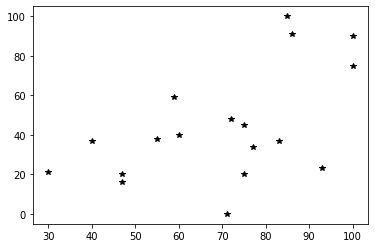

In [18]:
# Is there a relationship between the two variables (Scale1 and Scale2)?
plt.plot(data.iloc[:,0], data.iloc[:,1], 'k*')

The scatter plot indicates a tendency for high ratings on one scale seem to be related to high ratings on another one. And vice versa. But how can we quantify this?

<a id= 'Covariance'> </a>

## 2. Covariance

In the case of variance of one variable summed up the squared distance between each observation and the mean. To see whether two variables, x and y, *covary* we do a similar thing: 

$$cov(x,y)  =\frac {\sum{ (x_i - \bar{x}) (y_i - \bar{y})} } {N-1}$$

A positive covariance mean that x and y vary in similar way so that with X larger than the mean Y is also more likely to be larger than the mean. And vice versa. Note that this does not mean that a change in X *causes* Y to vary! 

In [28]:
#Get the covariance matrix of the whole data
data.cov()

,Scale1,Scale2,Scale3
Scale1,416.800654,317.562092,367.181373
Scale2,317.562092,809.163399,563.362745
Scale3,367.181373,563.362745,465.272059


### Try out 2:
Calculate the mean of the two scales and add as another variable "Scale 3" in the data frame. Calculate the coveriance matrix and compare. 

In [29]:
#Add another variable consisting of the mean data of Scale1 and Scale2
#data['Scale3']=
#data

#calculate covariance matrix

<a id= 'Coefficient'> </a>

## 3. Correlation coefficient

The Pearson Product-Moment Correlation Coefficient (r, or "correlation coefficient" for short) is a standardized measure of the linear relationship between two variables. The degree to which the relationship
can be explained by a linear model is expressed by the coefficient, r.

Departing from the covariance, the equation for the coefficient can be written as

$$r =  \frac {cov_{xy}} {s_x s_y} =\frac {\sum{ (x_i - \bar{x}) (y_i - \bar{y})} } {(N-1){s_x s_y}}$$

Where $s_x$ and $s_y$ are the sample standard deviations for x and y. Dividing the covariance with them gives a value which can vary between 1 (x and y perfectly correlated) and -1 (x and y perfectly negatively correlated)




In [33]:

data.corr()

,Scale1,Scale2
Scale1,1.000000,0.546822
Scale2,0.546822,1.000000


By calculating the correlation coefficient for different ratings of the same stimuli, it is possible to get a measure of how *reliable* the measure is. For instance one can use it to see to what degree participants tend to rate a stimulus the same way when presented with it several times. An unreliable measure has a large variability due to noise, which would be reflected in an $r$ close to 0. 


### Try out 3:
When converting analogue signals to digital, there are only a certain number of values that can be represented in the computer. 
In this case, we have data from a distance sensor, the produced voltage output, and the converted (ADC) value. Plot the two latter and calculate the correlation coefficient.


In [66]:
#Here is an excerpt from the data:
array=np.array([[1200,94,0.46],
[1210,93,0.45],
[1220,93,0.45],
[1230,92,0.45],
[1240,90,0.44],
[1250,89,0.43],
[1260,89,0.43],
[1270,89,0.43],
[1280,88,0.43],
[1290,86,0.42],
[1300,85,0.42],
[1310,85,0.42],
[1320,85,0.42],
[1330,84,0.41],
[1340,83,0.41],
[1350,82,0.40],
[1360,81,0.40],
[1370,81,0.40],
[1380,80,0.39],
[1390,80,0.39],
[1400,77,0.38],
[1410,77,0.38],
[1420,76,0.37],
[1430,76,0.37],
[1440,76,0.37],
[1450,76,0.37],
[1460,75,0.37],
[1470,74,0.36],
[1480,73,0.36],
[1490,72,0.35],
[1500,72,0.35]])

#And to make it convenient we put this in a data frame with index for the participants
index = [f'participant_{num}' for num in range(array.shape[0])] #generate row index for all entries

sensor= pd.DataFrame(array, columns=(["Distance","ADC", "Voltage"]), index=index)

#check the format of data frame
print(sensor.shape)

sensor.describe()

#one way to plot
#plt.plot(sensor.ADC, sensor.Voltage, '+')

#calculate correlation as above

(31, 3)


,Distance,ADC,Voltage
count,31.000000,31.000000,31.000000
mean,1350.000000,82.354839,0.402581
std,90.921211,6.770270,0.032452
min,1200.000000,72.000000,0.350000
25%,1275.000000,76.000000,0.370000
50%,1350.000000,82.000000,0.400000
75%,1425.000000,88.500000,0.430000
max,1500.000000,94.000000,0.460000


As expected (and hoped for) the values are highly correlated. 

<a id= 'Regression'> </a>

## 4. Linear Regression


In linear regression, a variable $y$ is predicted by $x$ in terms of a linear relationship between the two. The method finds the straight line that best fits the data points and $y$ is expressed in terms of $x$ in the common equation:

$$y=a+bx$$

Where the constant $a$ is the *intercept* (the value of $y$ when $x=0$), and the constant $b$ is a measure of the inclination (the ``steepness'' of the line). 



For instance, if we want use the distance sensor in an application to measure distance, we would much rather know what the ADC values correspond to in distance (mm). One way is to plot the values.


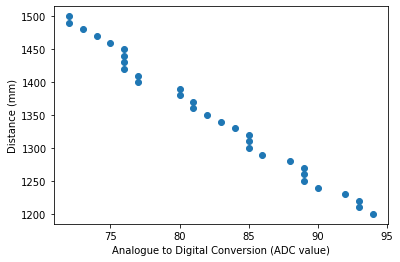

In [69]:
plt.scatter(sensor.ADC,sensor.Distance)
plt.xlabel('Analogue to Digital Conversion (ADC value)')
plt.ylabel('Distance (mm)')
plt.show()

 But more convenient would be to make a model using linear regression and *fit* a line to the points. 

### Try out 4:
Apply a linear fit, print the output and identify a and b in the equation
 $Distance= a*ADC + b$

In [76]:
distmodel=np.polyfit(sensor.ADC,sensor.Distance,1)

#only 1st order polynomial here, see help(np.polyfit)

print(distmodel)  
# for  decrease of 1 ADC the corresponding distance increases by... (first number)
# for  0 ADC output the corresponding distance would be... (second)

[ -13.35905977 2450.18321291]


It is important to check whether the output of the model makes sense in relation to the data. 

We can also check the prediction of our model by producing values according to it, and plot it with the original data.

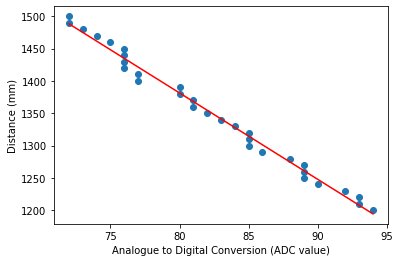

In [78]:
Distpred=np.poly1d(distmodel) #construct predicted output based on model

D_lin_reg=Distpred(sensor.ADC)
plt.scatter(sensor.ADC,sensor.Distance)
plt.plot(sensor.ADC,D_lin_reg, c='r')

plt.xlabel('Analogue to Digital Conversion (ADC value)')
plt.ylabel('Distance (mm)')
plt.show()

The regression model, and prediction of data based on it, is at the basis of machine learning. Only, the data and models are often much more complex. 

It is important to stress that both correlation and linear regression express the *LINEAR* relationship between variables. There can be other, non-linear relationships in data that we should not use these methods for.

In the above plot, we have quite a good fit. But in our example, we have only used a only a small portion of the range of the sensor. 
We can use the full data available and see whether our model would be useful also for other ranges.

### Try out 5:
Get the full data (DistanceSensorData.csv) found in this archive https://lucidar.me/en/arduino/files/SHARP_Distance_Sensors.zip (from https://lucidar.me/en/arduino/arduino-accurate-distance-measurement-sharp-GP2Y0A21YK/)
Load it and plot. Would it be suitable to perform a linear regression on the data? 

In [ ]:
#Load the data. You can use pd.read_csv like the suggstion here:
#Sharp = pd.read_csv('DistanceSensorData.csv', delimiter = '\t',names=('Distance', 'ADC','Voltage'))

#remember to check shape and content of the data frame once loaded

#see what the correlation function would put out.